***Linear and logistic regression assume that the variables are normally distributed. If they are
not, we can often apply a mathematical transformation to change their distribution into
Gaussian, and sometimes even unmask linear relationships between variables and their
targets. This means that transforming variables may improve the performance of linear
machine learning models.***

Commonly used transformations are:
- Logarithm, Square, Cube Root
- Reciprocal, Power 
- Box-Cox Trnasfomation
- Yeo Johnson Transformation

## Transforming variables with the logarithm


It has a strong effect on
the shape of the variable distribution and can only be applied to positive variables (bcoz log is not defined for negative numbers).

_We will also create a diagnostic plot function to evaluate the effect of
the transformation on the variable distribution._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

In [33]:
boston = load_boston()

In [34]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [35]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


To evaluate the effect of the transformation on the variable distribution, we'll
create a function that takes a dataframe and a variable name as inputs and plots a
histogram next to a Q-Q plot:


In [36]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)   # histogram
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()

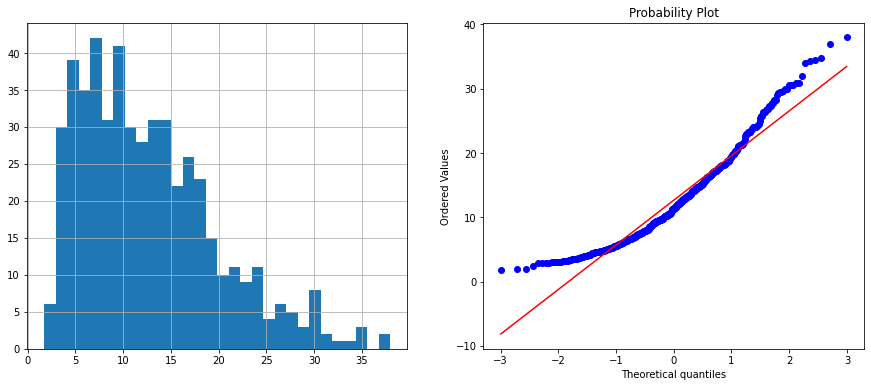

In [37]:
# Plotting the distribution of LSTAT variable
diagnostic_plots(data_boston, 'LSTAT')    # LTSAT is not normally distributed
# It is right/postiviely skwewed.
# Its qunatiles also don't align with the 46 degree diagonal red line

In [38]:
# Let's apply the logarithmic transformation
# copy the original dataset so that we can keep it safe

In [39]:
data_copy = data_boston.copy()    # if we'd done data_copy = data_boston, it will create a new alias of the df 
# instead of copying it

#### Using feature_engine LogTransformer( )

In [40]:
log_transformer = LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'], base='e')

In [41]:
log_transformer.fit(data_boston)

LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [42]:
data_copy = log_transformer.transform(data_boston)

In [43]:
data_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,-0.619897,1.883275,65.2,1.408545,1.0,296.0,15.3,396.90,1.605430
1,0.02731,0.0,7.07,0.0,-0.757153,1.859574,78.9,1.602836,2.0,242.0,17.8,396.90,2.212660
2,0.02729,0.0,7.07,0.0,-0.757153,1.971996,61.1,1.602836,2.0,242.0,17.8,392.83,1.393766
3,0.03237,0.0,2.18,0.0,-0.780886,1.945624,45.8,1.802073,3.0,222.0,18.7,394.63,1.078410
4,0.06905,0.0,2.18,0.0,-0.780886,1.966693,54.2,1.802073,3.0,222.0,18.7,396.90,1.673351


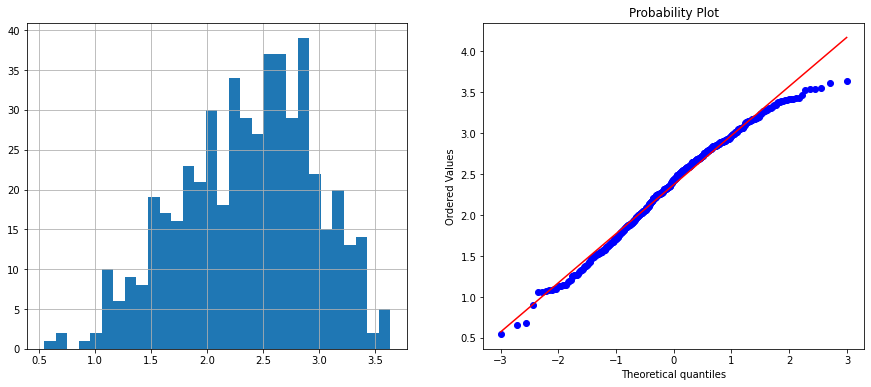

In [44]:
diagnostic_plots(data_copy, 'LSTAT')

## Transforming variables with the reciprocal function


The reciprocal function, defined as `1/x`, is a strong transformation with a very drastic effect
on the variable distribution. It isn't defined for the value `0`, but it can be applied to negative
numbers.

In [28]:
# From now onwards i'm using only one approach to show you

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from feature_engine.transformation import ReciprocalTransformer
import warnings
warnings.filterwarnings('ignore')

In [32]:
boston = load_boston()

In [45]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [46]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


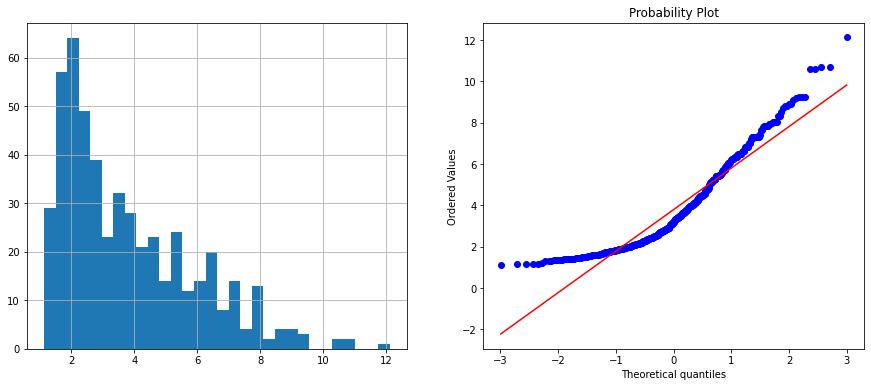

In [47]:
diagnostic_plots(data_boston, 'DIS')   # Not normally distributed. Right Skewed

In [48]:
data_copy = data_boston.copy()

In [49]:
reci_transformer = ReciprocalTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [50]:
reci_transformer.fit(data_boston)

ReciprocalTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [51]:
# Storing the transformed data in the copied df
data_copy = reci_transformer.transform(data_boston)

In [52]:
data_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,1.858736,0.152091,65.2,0.244499,1.0,296.0,15.3,396.90,0.200803
1,0.02731,0.0,7.07,0.0,2.132196,0.155739,78.9,0.201325,2.0,242.0,17.8,396.90,0.109409
2,0.02729,0.0,7.07,0.0,2.132196,0.139179,61.1,0.201325,2.0,242.0,17.8,392.83,0.248139
3,0.03237,0.0,2.18,0.0,2.183406,0.142898,45.8,0.164957,3.0,222.0,18.7,394.63,0.340136
4,0.06905,0.0,2.18,0.0,2.183406,0.139919,54.2,0.164957,3.0,222.0,18.7,396.90,0.187617


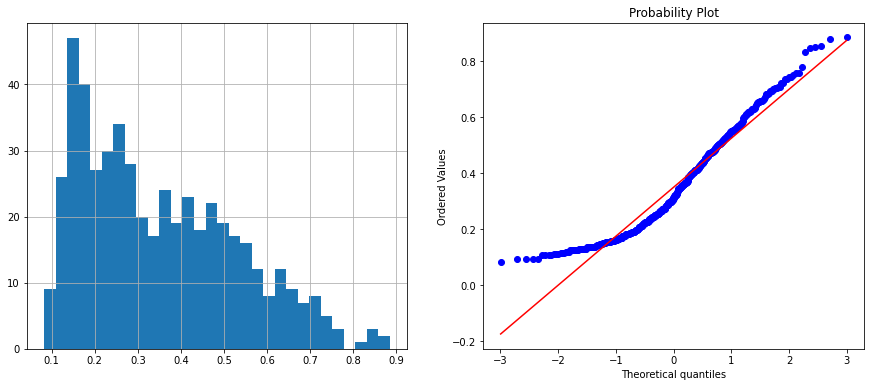

In [53]:
diagnostic_plots(data_copy, 'DIS')